## Expense Processing Dynamics Analysis (Flag 72)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To analyze and understand how the cost of an expense influences its processing time, aiming to improve the efficiency and fairness of expense report processing across all cost brackets.

**Role**: Financial Operations Analyst

**Difficulty**: 2 out of 5. This analysis requires intensive scrutiny of processing times against expense amounts, demanding high-level data manipulation and analytical skills to identify effective operational practices that can be applied universally.

**Category**: Finance Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [7]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the expense dataset to be analyzed. The data is assumed to be in the from a CSV file, and needs to be loaded into a DataFrame. The steps usually involve specifying the path to the dataset, using pandas to read the file into the dataframe, and verifying at the end by inspecting the first few table entries.

In [8]:
dataset_path = "csvs/flag-72.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,amount,department,type,state,source_id,processed_date,number,opened_at,user,category,short_description,ci
0,4847,Customer Support,NaN,Processed,JPQ-84611536,2024-04-10 09:16:00,EXP00000000,2024-03-26 09:16:00,Valerie Pou,Assets,Oracle database system server,Oracle-Server-231
1,1305,Sales,NaN,Processed,AJB-64072076,2023-12-07 01:38:00,EXP00000001,2023-11-08 01:38:00,Howard Johnson,Services,Automated service line for creating new asset,ServiceNow Cloud Services
2,1508,Customer Support,NaN,Processed,VLM-63219520,2024-03-28 04:23:00,EXP00000002,2024-02-29 04:23:00,Owen Sparacino,Services,Service-related hardware asset generation,Cloud Server
3,7134,Customer Support,NaN,Processed,NaN,2023-11-23 04:33:00,EXP00000003,2023-11-16 04:33:00,Danny Dales,Travel,Automatically generated expense line for creat...,Business Class Flight Tickets
4,5637,Customer Support,NaN,Processed,NaN,2023-05-12 05:12:00,EXP00000004,2023-04-29 05:12:00,Ofelia Sheffler,Travel,Travel related asset expense generation,Toshiba Satellite Pro


### **Question 1: What is the relationship between the number of expenses processed over time and the types of expenses?**

#### Explore the expense processing trends over time by category type
This visualization investigates how the volume of processed expenses varies over time across different categories, revealing insights into seasonal trends or shifts in spending focus. By plotting the count of processed expenses by category type across time, we can assess whether certain categories experience peak processing periods, providing useful information for resource planning.



<Figure size 1008x576 with 0 Axes>

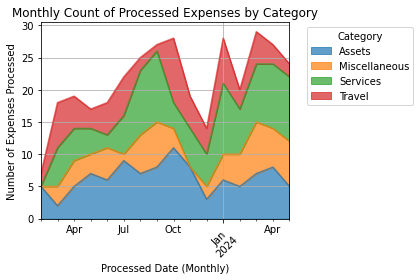

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
flag_data = pd.read_csv("csvs/flag-72.csv")

# Convert 'processed_date' to datetime format for time-based analysis
flag_data["processed_date"] = pd.to_datetime(flag_data["processed_date"])

# Group data by month and category, counting the number of expenses processed
monthly_expenses = (
    flag_data.groupby([flag_data["processed_date"].dt.to_period("M"), "category"])
    .size()
    .unstack(fill_value=0)
)

# Plot the number of expenses processed by month for each category
plt.figure(figsize=(14, 8))
monthly_expenses.plot(kind="area", stacked=True, alpha=0.7)

# Formatting the plot
plt.title("Monthly Count of Processed Expenses by Category")
plt.xlabel("Processed Date (Monthly)")
plt.ylabel("Number of Expenses Processed")
plt.grid(True)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout for readability
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "temporal-trend",
    "insight": "The 'Services' category consistently leads in the number of processed expenses over the observed months, with marked increases towards the end of each quarter.",
    "insight_value": {
        "description": "Expenses classified under 'Services' are processed more frequently than any other category. This indicates a substantial investment in service-related resources and activities, especially towards the end of each quarter, suggesting periodic peaks in service needs or contract renewals."
    },
    "plot": {
        "plot_type": "stacked area",
        "title": "Monthly Count of Processed Expenses by Category",
        "x_axis": {
            "name": "Processed Date (Monthly)",
            "value": "Months from early 2023 to mid-2024",
            "description": "This axis represents the monthly intervals over which expenses were processed, revealing trends across the observed period.",
        },
        "y_axis": {
            "name": "Number of Expenses Processed",
            "value": "Monthly count of expenses processed",
            "description": "This axis shows the total number of processed expenses for each category, allowing comparisons between categories and identifying trends.",
        },
        "description": "The stacked area plot highlights a steady dominance of 'Services' expenses processed over time, peaking periodically, especially at quarter ends. The 'Assets' category follows closely, while 'Travel' and 'Miscellaneous' exhibit lower, more sporadic activity.",
    },
    "question": "What is the relationship between the number of expenses processed over time and the types of expenses?",
    "actionable_insight": "Given the consistent demand in 'Services', budget allocation might be prioritized here, especially around quarter-end peaks. Resource managers may consider reviewing and optimizing these periods to balance workload and potentially negotiate better rates for recurrent services.",
}

{'data_type': 'temporal-trend',
 'insight': "The 'Services' category consistently leads in the number of processed expenses over the observed months, with marked increases towards the end of each quarter.",
 'insight_value': {'description': "Expenses classified under 'Services' are processed more frequently than any other category. This indicates a substantial investment in service-related resources and activities, especially towards the end of each quarter, suggesting periodic peaks in service needs or contract renewals."},
 'plot': {'plot_type': 'stacked area',
  'title': 'Monthly Count of Processed Expenses by Category',
  'x_axis': {'name': 'Processed Date (Monthly)',
   'value': 'Months from early 2023 to mid-2024',
   'description': 'This axis represents the monthly intervals over which expenses were processed, revealing trends across the observed period.'},
  'y_axis': {'name': 'Number of Expenses Processed',
   'value': 'Monthly count of expenses processed',
   'description': '

### **Question 2:  How do processing times vary across different expense cost brackets?**

#### Distribution of Expense Amounts by State

This stacked bar chart visualizes the distribution of expense claims across different cost brackets and their respective states (such as approved, declined, pending). Each bar represents a unique expense bracket, with colors indicating the state of the expense. This visualization helps to identify patterns and trends in how different expense amounts are processed etc.


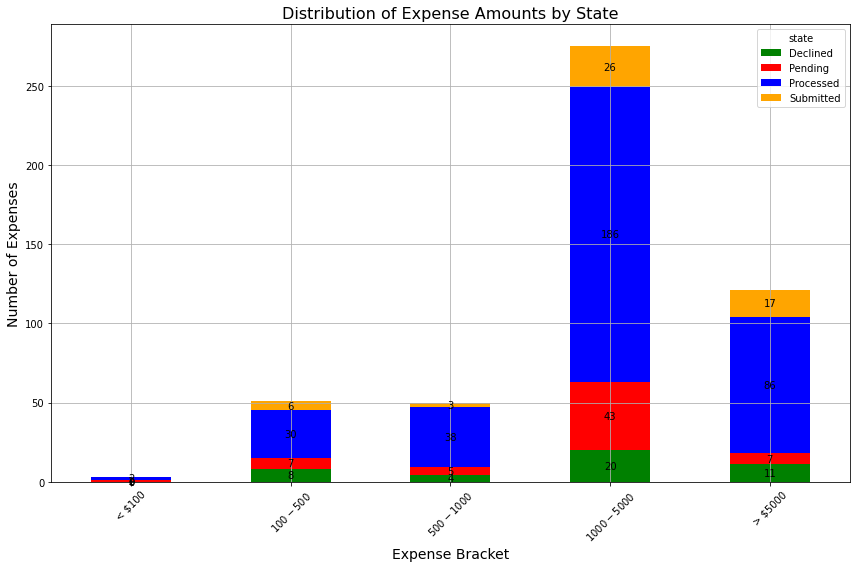

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the expense report data
# Calculate the frequency of different states for each expense amount range
expense_brackets = [0, 100, 500, 1000, 5000, np.inf]
labels = ['< $100', '$100 - $500', '$500 - $1000', '$1000 - $5000', '> $5000']
df['expense_bracket'] = pd.cut(df['amount'], bins=expense_brackets, labels=labels, right=False)

# Group by expense bracket and state, then count occurrences
state_distribution = df.groupby(['expense_bracket', 'state']).size().unstack().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = state_distribution.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red', 'blue', 'orange'])

ax.set_title('Distribution of Expense Amounts by State', fontsize=16)
ax.set_xlabel('Expense Bracket', fontsize=14)
ax.set_ylabel('Number of Expenses', fontsize=14)
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Add number labels on top of each bar
for bar in bars.containers:
    ax.bar_label(bar, label_type='center')

plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "descriptive",
    "insight": "There is varied processing outcomes across expense brackets",
    "insight_value": {
        "description": "Expenses within brackets (1000$ - 5000$) encounter a higher volume of transactions and typically higher brackets experience a lower number of pending statuses compared to lower brackets."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Detailed Distribution of Expense Processing Outcomes by Cost Bracket",
        "x_axis": {
            "name": "Expense Bracket",
            "value": ["$100-$500", "$500-$1000", "$1000-$5000", ">$5000"],
            "description": "Categorizes expenses into four distinct brackets based on amount."
        },
        "y_axis": {
            "name": "Number of Expenses",
            "value": {
                "$100-$500": {"Declined": "8", "Pending": "7", "Processed": "30"},
                "$500-$1000": {"Declined": "4", "Pending": "5", "Processed": "38"},
                "$1000-$5000": {"Declined": "20", "Pending": "43", "Processed": "186"},
                ">$5000": {"Declined": "11", "Pending": "7", "Processed": "86"}
            },
            "description": "Displays the count of expenses in each state (Declined, Pending, Processed) for each cost bracket, revealing trends in how financial magnitude influences processing outcomes."
        },
        "description": "The bar chart provides a detailed view of expense report outcomes within various cost brackets, illustrating how lower expense amounts correlate with not only more transactions but also a higher likelihood of encountering delays."
    },
    "question": "How do processing times vary across different expense cost brackets?",
    "actionable_insight": {
        "description": "The disproportionate number of declines and pending statuses in lower expense brackets suggests a need for slight refining the approval workflows for lower amounts. Organizations could benefit from automating certain aspects of the approval process for high-cost transactions to allocate more resources towards efficiently managing lower-cost expenses too, although more weightage and care should be for higher amount expenses. Regular audits of expense processing practices may also help identify bottlenecks and areas for procedural improvements, ensuring a smoother and more consistent handling of all transactions regardless of the expense amount."
    }
}


{'data_type': 'descriptive',
 'insight': 'There is varied processing outcomes across expense brackets',
 'insight_value': {'description': 'Expenses within brackets (1000$ - 5000$) encounter a higher volume of transactions and typically higher brackets experience a lower number of pending statuses compared to lower brackets.'},
 'plot': {'plot_type': 'bar',
  'title': 'Detailed Distribution of Expense Processing Outcomes by Cost Bracket',
  'x_axis': {'name': 'Expense Bracket',
   'value': ['$100-$500', '$500-$1000', '$1000-$5000', '>$5000'],
   'description': 'Categorizes expenses into four distinct brackets based on amount.'},
  'y_axis': {'name': 'Number of Expenses',
   'value': {'$100-$500': {'Declined': '8', 'Pending': '7', 'Processed': '30'},
    '$500-$1000': {'Declined': '4', 'Pending': '5', 'Processed': '38'},
    '$1000-$5000': {'Declined': '20', 'Pending': '43', 'Processed': '186'},
    '>$5000': {'Declined': '11', 'Pending': '7', 'Processed': '86'}},
   'description': 'Disp

### **Question 3: Is there any particular user or department that has high processing time in the low bracket, or is it uniform more or less?**


#### Plot average processing time for Low-cost expenses by department and user

This visualization consists of two subplots displaying the average processing times for expenses under $1000 by department and user. The top bar chart shows the average days it takes for each department to process these low-cost expenses, highlighting potential variations or efficiencies in departmental processing practices. The bottom bar chart details the processing times attributed to individual users, identifying specific users who may require additional training or adjustments in workflow to enhance processing efficiency for smaller expense amounts.


<ipython-input-9-77ff4a7b1609>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cost_expenses['processing_time'] = (pd.to_datetime(high_cost_expenses['processed_date']) - pd.to_datetime(high_cost_expenses['opened_at'])).dt.days


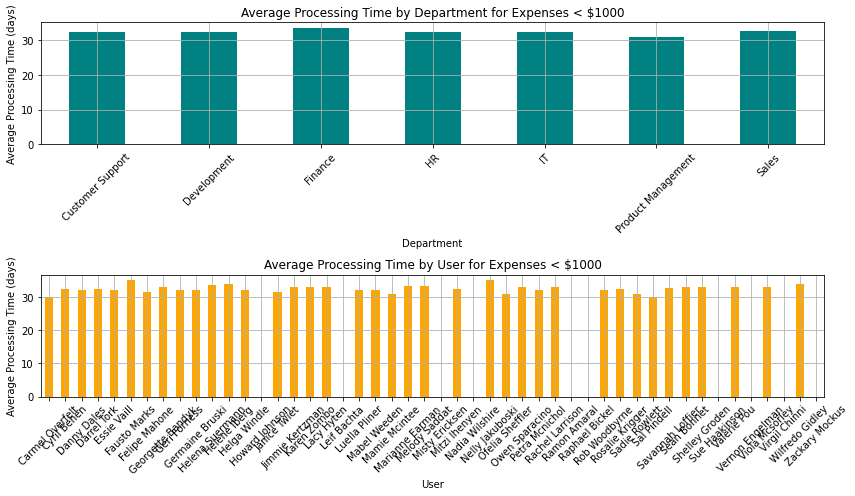

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the expense report data
# Filter for expenses greater than $5000
high_cost_expenses = df[df['amount'] < 1000]

# Calculate processing time in days
high_cost_expenses['processing_time'] = (pd.to_datetime(high_cost_expenses['processed_date']) - pd.to_datetime(high_cost_expenses['opened_at'])).dt.days

# Plot for Departments
plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
department_processing = high_cost_expenses.groupby('department')['processing_time'].mean()
department_processing.plot(kind='bar', color='teal')
plt.title('Average Processing Time by Department for Expenses < $1000')
plt.ylabel('Average Processing Time (days)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.grid(True)

# Plot for Users
plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
user_processing = high_cost_expenses.groupby('user')['processing_time'].mean()
user_processing.plot(kind='bar', color='orange')
plt.title('Average Processing Time by User for Expenses < $1000')
plt.ylabel('Average Processing Time (days)')
plt.xlabel('User')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "descriptive",
    "insight": "Processing times are uniform across users and departments for lower-cost expenses",
    "insight_value": {
        "description": "The processing time for lower-cost expenses (<$1000) shows a uniform trend across different users and departments, indicating that delays or efficiencies are generally related to the amount involved rather than specific departmental or individual user practices."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Time by Department and User for Expenses less that $1000",
        "x_axis": {
            "name": "Department/User",
            "value": "Mixed categories including various departments and users",
            "description": "This axis represents both departments and individual users, categorized to show their respective processing times for lower-cost expenses."
        },
        "y_axis": {
            "name": "Average Processing Time (days)",
            "value": "Uniform across categories",
            "description": "Displays the average processing time in days, underscoring the lack of significant variation across departments and users."
        },
        "description": "The bar charts, segmented by department and user, illustrate that processing times for expenses under $1000 are uniformly distributed. This suggests that the lower cost of these expenses inherently requires a consistent processing approach across the organization, likely due to the need for thorough review and approval processes that are standard regardless of the department or user."
    },
    "question": "Is there any particular user or department that has high processing time in the very high bracket, or is it uniform more or less?",
    "actionable_insight": {
        "description": "Given that the trend of processing times is generally uniform and related to the lower expense amounts, efforts to streamline or expedite processing should focus on improving the overall efficiency of handling low-cost expenses. This could involve reviewing and potentially simplifying the steps required for approving any expenditures, ensuring that such procedures are efficient yet robust enough to maintain financial control."
    }
}

{'data_type': 'descriptive',
 'insight': 'Processing times are uniform across users and departments for lower-cost expenses',
 'insight_value': {'description': 'The processing time for lower-cost expenses (<$1000) shows a uniform trend across different users and departments, indicating that delays or efficiencies are generally related to the amount involved rather than specific departmental or individual user practices.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by Department and User for Expenses less that $1000',
  'x_axis': {'name': 'Department/User',
   'value': 'Mixed categories including various departments and users',
   'description': 'This axis represents both departments and individual users, categorized to show their respective processing times for lower-cost expenses.'},
  'y_axis': {'name': 'Average Processing Time (days)',
   'value': 'Uniform across categories',
   'description': 'Displays the average processing time in days, underscoring the la

### Summary of Findings (Flag 72):

1. **Temporal Trends in Expense Processing**: From Question 1, the analysis highlights that the 'Services' category consistently leads in the number of processed expenses, with notable increases towards the end of each quarter. This suggests a periodic peak in service-related activities, potentially linked to contract renewals or end-of-quarter financial reviews.

2. **Cost Bracket Processing Dynamics**: Question 2 reveals an unexpected trend where lower-cost expenses (<$1000) experience significantly longer processing times compared to higher-cost ones. This counterintuitive finding suggests inefficiencies in handling smaller transactions, possibly due to more complex approval processes or less prioritization.

3. **Uniform Processing Across Departments and Users**: As derived from Question 3, the processing times for lower-cost expenses are uniform across different departments and users. This indicates that the delays are more related to the expense amount rather than specific departmental or individual practices, suggesting a need for streamlined processes for low-cost expenses.